In [2]:
#项目6-项目实施代码
import pandas as pd

#读取数据
names=['age','height','weight','gender']
dataset=pd.read_csv('gender-data-y.txt',delimiter=',',names=names)
print('客户信息数据集')
print(dataset)

客户信息数据集
    age  height  weight gender
0    21     163      60      M
1    22     164      56      M
2    21     170      50      M
3    23     168      56      M
4    21     169      60      M
..  ...     ...     ...    ...
95   24     192      73      F
96   25     187      74      F
97   20     178      65      F
98   23     172      76      F
99   25     173      78      F

[100 rows x 4 columns]


In [3]:
#数据预处理
from sklearn import preprocessing
#数据类型转换（将身高和体重数据转换为浮点型数据）
dataset['height']=dataset['height'].astype(float)
dataset['weight']=dataset['weight'].astype(float)
#对"性别"列进行数值化处理
le=preprocessing.LabelEncoder()#标签编码
dataset['label']=le.fit_transform(dataset['gender']) #转换为数值标签
print('处理后的客户信息数据集')
print(dataset)

处理后的客户信息数据集
    age  height  weight gender  label
0    21   163.0    60.0      M      1
1    22   164.0    56.0      M      1
2    21   170.0    50.0      M      1
3    23   168.0    56.0      M      1
4    21   169.0    60.0      M      1
..  ...     ...     ...    ...    ...
95   24   192.0    73.0      F      0
96   25   187.0    74.0      F      0
97   20   178.0    65.0      F      0
98   23   172.0    76.0      F      0
99   25   173.0    78.0      F      0

[100 rows x 5 columns]


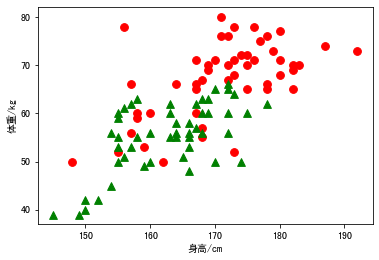

In [4]:
#数据集可视化
import matplotlib.pyplot as plt

data=dataset.iloc[range(0,100),range(1,3)].values  #提取身高和体重数据
target=dataset.iloc[range(0,100),range(4,5)].values.reshape(1,100)[0]#提取标签值
#绘制散点图
plt.scatter(data[target==0,0],data[target==0,1],s=60,c='r',marker='o')	#绘制标签为0的样本点
plt.scatter(data[target==1,0],data[target==1,1],s=60,c='g',marker='^')	#绘制标签为1的样本点
#设置坐标轴的名称并显示图形
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('身高/cm')
plt.ylabel('体重/kg')
plt.show()

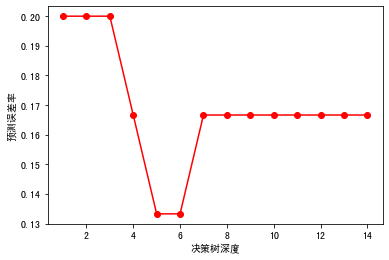

In [5]:
#确定决策树的最佳深度值
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#划分数据集
x,y=data,target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)
#决策树深度与模型预测误差率计算
depth=np.arange(1,15)
err_list=[]
for i in depth:
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    ac=accuracy_score(y_test,pred)
    err=1-ac
    err_list.append(err)
#绘制决策树深度与模型预测误差率图形
plt.plot(depth,err_list,'ro-')
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('决策树深度')
plt.ylabel('预测误差率')
plt.show()

In [6]:
#训练与评估模型
from sklearn.metrics import classification_report
#决策树深度取值为5时，训练模型
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)
#对模型进行评估，并输出评估报告
pred=model.predict(x_test)
re=classification_report(y_test,pred)
print('模型评估报告：')
print(re)

模型评估报告：
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.79      1.00      0.88        15

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30



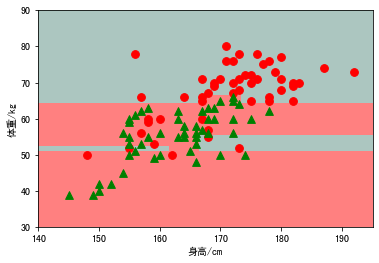

In [7]:
#绘制可视化图形，显示分类结果
from matplotlib.colors import ListedColormap

#绘制分类界面
N,M=500,500                  #网格采样点的个数
t1=np.linspace(140,195,N)        #生成采样点的横坐标值
t2=np.linspace(30,90,M)        #生成采样点的纵坐标值
x1,x2=np.meshgrid(t1,t2)     #生成网格采样点
x_new=np.stack((x1.flat,x2.flat),axis=1)  #将采样点作为测试点
y_predict=model.predict(x_new)  #预测测试点的值
y_hat=y_predict.reshape(x1.shape) #与x1设置相同的形状
iris_cmap=ListedColormap(["#ACC6C0","#FF8080"])                   #设置分类界面的颜色
plt.pcolormesh(x1,x2,y_hat,cmap=iris_cmap)                       #绘制分类界面

#绘制两个类别的样本数据点
plt.scatter(x[y==0,0],x[y==0,1],s=60,c='r',marker='o')	#绘制标签为0的样本点
plt.scatter(x[y==1,0],x[y==1,1],s=60,c='g',marker='^')	#绘制标签为1的样本点

#设置坐标轴的名称并显示图形
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('身高/cm')
plt.ylabel('体重/kg')
plt.show()